In [ ]:
# !sudo apt -y install libportaudio2
!pip install -q tflite-model-maker-nightly

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [ ]:
import pandas as pd
# import numpy as np
import tensorflow as tf
# import keras
from tflite_model_maker import model_spec, text_classifier
# from sklearn.model_selection import train_test_split
# from tflite_model_maker.config import ExportFormat
# from tflite_model_maker.text_classifier import AverageWordVecSpec
from tflite_model_maker.text_classifier import DataLoader

## BERT Model

In [ ]:
mb_spec = model_spec.get('mobilebert_classifier')

In [ ]:
test_data = DataLoader.from_csv(
      filename="/content/drive/MyDrive/EY/pasco_house_plot_number_6,_old_delhi_gurgaon_road,_industrial_estate,sector_18,_gurugram,_haryana,_122015.csv",
      text_column='Text',
      label_column='Rating',
      model_spec=mb_spec,
      is_training=False)

# Predict

In [ ]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/EY/Model_90/saved_model", compile=False)

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 hub_keras_layer_v1v2 (HubKeras  (1, 512)            24581888    ['input_word_ids[0][0]',         
 LayerV1V2)                                                       'input_mask[0][0]',         

```__label__1 : -ve  -> 0```

```__label__2 : +ve  -> 1```

In [ ]:
# df2 = pd.read_csv("/content/drive/MyDrive/EY/pasco_house_plot_number_6,_old_delhi_gurgaon_road,_industrial_estate,sector_18,_gurugram,_haryana,_122015.csv", index_col=0)
# df = pd.read_csv("/content/drive/MyDrive/EY/T_R_SAWHNEY_MOTORS_PVT._LTD._9-10_3_,LAXMAN_HOUSE.csv", index_col=0)
df = pd.read_csv("/content/drive/MyDrive/EY/Blue_Dart_Express_Ltd_Survey_No_142,_Sri_Sai_Gayatri_Towers.csv", index_col=0)

In [ ]:
df["% +ve"] = new_model.predict(test_data.gen_dataset())[:,1]*100

In [ ]:
df.head()

,Text,Rating,Category,% +ve
0,Good courier services with proper service. Aft...,4.0,Relavent,99.987305
1,Wrost service delivery... 0 rating is not ther...,1.0,Relavent,99.898918
2,Front desk lady was very polite and helpful as...,5.0,Relavent,99.931442
3,Worst service done by this courier department....,1.0,Relavent,99.974854
4,"No more a trusted partner for deliveries, most...",1.0,Relavent,99.984917


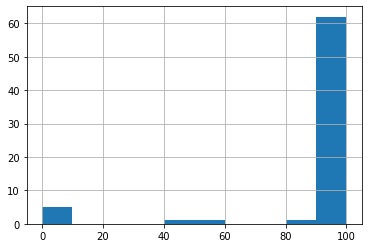

In [ ]:
df["% +ve"].hist()

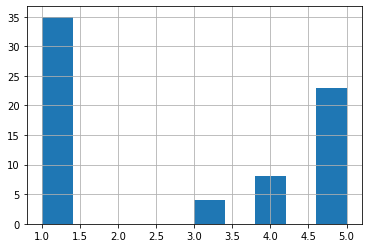

In [ ]:
df["Rating"].hist()